**O presente notebook trata do conjunto de dados sobre as transação na loja com margem de lucro sobre o produto variando entre 10% e 300%, a fim de se obter um alcance mais amplo dos valores, com registros feitos com intervalo de 10% entre si.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
folder = "C:/Users/sucod/OneDrive/Lenovo/Documentos/Sql/"

ran = 301

**Abaixo está o pairplot de valores médios e totais contra o Lucro Percentual, número médio de Vendas por departamento e número total de vendas por departamento, referente ao banco de dados exportado para *CSVLoja2*:**

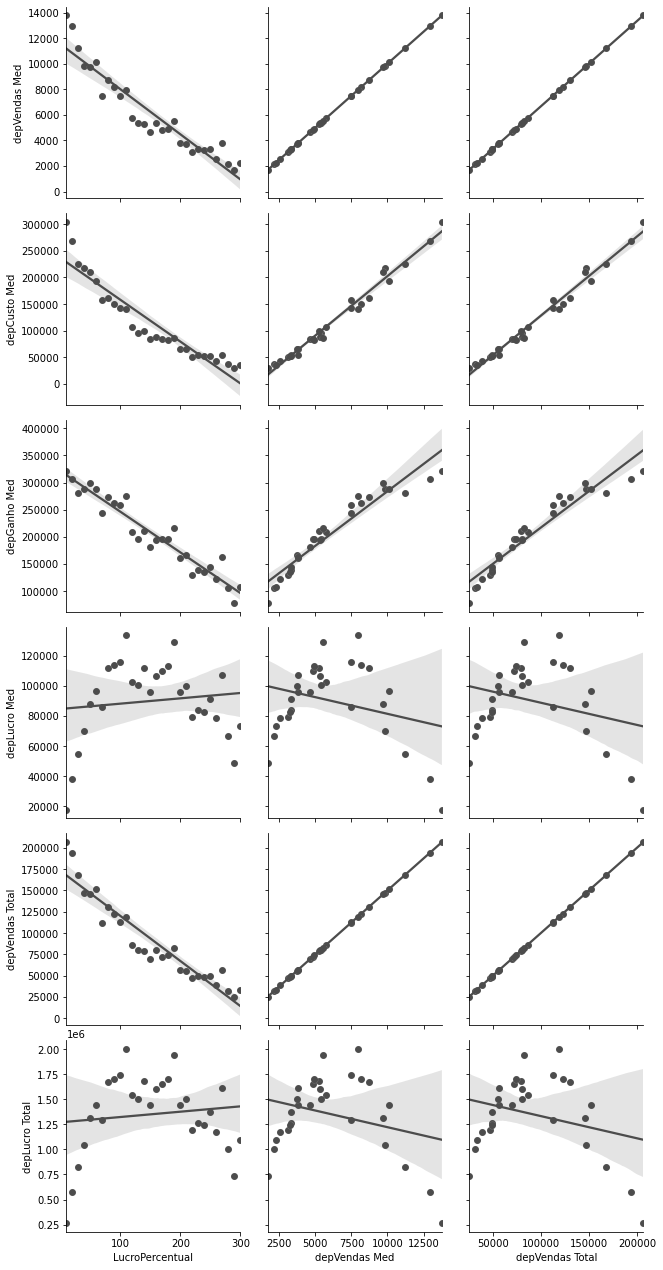

In [25]:
Colunas = ["LucroPercentual","depVendas Med","depCusto Med","depGanho Med","depLucro Med","depVendas Total","depLucro Total"]
Linhas  = list(range(10,ran,10))
df_departamento_medias = pd.DataFrame(columns = Colunas, index = Linhas)

df_departamento_medias["LucroPercentual"] = Linhas
depVendas_list = []
depCusto_list = []
depGanho_list = []
depLucro_list = []
depVendasTotal_list = []
depLucroTotal_list = []

for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depVendas_list.append((df.describe()).iloc[1,2])
df_departamento_medias["depVendas Med"] = depVendas_list

for x in range(10,ran,10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depCusto_list.append((df.describe()).iloc[1,3])
df_departamento_medias["depCusto Med"] = depCusto_list
    
for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depGanho_list.append((df.describe()).iloc[1,4])
df_departamento_medias["depGanho Med"] = depGanho_list

for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depLucro_list.append((df.describe()).iloc[1,5])
df_departamento_medias["depLucro Med"] = depLucro_list

for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depVendasTotal_list.append(df["depVendas"].sum())
df_departamento_medias["depVendas Total"] = depVendasTotal_list

for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(x))
    depLucroTotal_list.append(df["depLucro"].sum())
df_departamento_medias["depLucro Total"] = depLucroTotal_list

#df_departamento_medias.to_csv(r"{}".format(folder)+"/df_departamento_medias.csv")
#df_departamento_medias

grid = sns.PairGrid(df_departamento_medias, 
                    y_vars=["depVendas Med","depCusto Med","depGanho Med","depLucro Med", "depVendas Total","depLucro Total"], 
                 x_vars=["LucroPercentual","depVendas Med", "depVendas Total"], height = 3)
grid.map(plt.scatter, s=50, edgecolor="white", color = ".3")
grid.map(sns.regplot, color=".3")

**A partir da principal variável de interesse, que seria o Lucro Total de toda a loja (ou a soma dos lucros totais de todos os departamentos), contra o Lucro Percentual sobre o custo de um produto, de fato é possível observar queda após crescimento de acordo com o aumento dessa margem de lucro percentual, exibindo, inclusive, uma região de valor máximo de Lucro final.**

**Com os dados da lista de lucros totais a seguir, é possível obter uma curva de ajuste pelos pontos. Esta curva foi escolhida como sendo uma distribuição log-normal principalmente por sua simetria à direita**

**O ajuste da curva foi feito no software Wolfram Mathematica (v. notebook ou PDF *Ajuste_Lucro_Total_Acumulado*), com os seguintes parâmetros:**

In [8]:
A = 8.9326*10**8
u = 5.8474
s = 1.0702

def lognorm(A, s, u, x):
     return A* np.exp(-(-u+np.log(x))**2/(2*s**2))/(np.sqrt(2*np.pi)*s*x)

**Ajustada da seguinte maneira:**

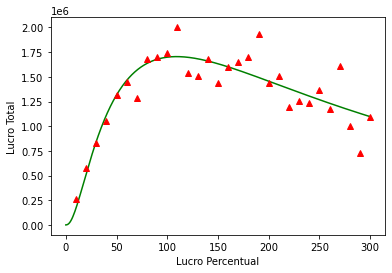

In [23]:
x=list(df_departamento_medias['LucroPercentual'].to_numpy())
y=list(df_departamento_medias['depLucro Total'].to_numpy())

plt.plot([lognorm(A, s, u, el) for el in range (1,301)],'g')
plt.plot(x,y,'r^')
plt.ylabel('Lucro Total')
plt.xlabel('Lucro Percentual')
plt.show()

**De fato, assim fica mais claro observar o comportamento do modelo tendo uma região de máximo total no lucro, com regiões de menores lucros antes e após. Ocorre que é possível inferir que, mesmo para produtos individuais, há valores de lucro sobre o custo mais propensas as gerar lucros finais absolutos maiores. E uma boa pergunta seria: existe um ajuste de lucro ideal independente para cada produto que maximize o lucro absoluto da loja?**

**Com o intuito de responder a essa questão, foi elaborado o seguinte modelo: toma-se o *valor* associado ao produto com maior *lucro final* para cada ponto de *lucro percentual*, e tenta-se um ajuste de curva para observar o comportamento, após isso, é possível encontrar uma função que ajusta o valor do produto com base no custo, invertendo a curva de ajuste. A lista de preços associados a máximo lucro por margem percentual correspondente:**

In [4]:
depMaxCusto_list = []

for x in range(10,ran, 10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(x))
    depMaxCusto_list.append([x,df.sort_values(by=['prodLucro'], ascending = False).iloc[0,5]])

depMaxCusto_list

[[10, 41.07],
 [20, 38.36],
 [30, 44.09],
 [40, 46.32],
 [50, 37.77],
 [60, 25.26],
 [70, 23.39],
 [80, 26.64],
 [90, 18.99],
 [100, 24.15],
 [110, 30.38],
 [120, 18.06],
 [130, 21.77],
 [140, 16.73],
 [150, 22.82],
 [160, 18.11],
 [170, 12.91],
 [180, 17.9],
 [190, 18.74],
 [200, 13.21],
 [210, 13.71],
 [220, 10.03],
 [230, 14.35],
 [240, 13.87],
 [250, 14.32],
 [260, 12.2],
 [270, 13.52],
 [280, 11.28],
 [290, 12.64],
 [300, 14.27]]

O processo para se econtrar essa função está no notebook Mathematica ou PDF *Ajuste_Lucro_por_Valor*. Após econtrá-la, a mesma foi aplicada à automação da loja otimizada nos arquivos *start_loja_db_Optm.py* e *fluxo_loja_toCSV_Optm*, a qual gerou um banco de dados exportado para a pasta *CSVLojaOpt*.

**O DataFrame obtido com as transações de lucro otimizado é resumido a seguir:**

In [24]:
df = pd.read_csv(r"{}".format(folder)+"/CSVLojaOpt/produto_opt.csv")
df.head()

,Unnamed: 0,idProduto,prodValor,prodEstoque,prodVendas,prodCusto,prodCustoAcum,prodGanhoAcum,prodLucro,Departamento_idDepartamento
0,0,1,49.52,44,271,35.03,8722.47,13419.9,4697.450,7
1,1,2,49.68,25,297,37.48,10981.60,14755.0,3773.320,14
2,2,3,50.08,87,300,45.67,15938.80,15024.0,-914.829,11
3,3,4,34.90,57,450,4.06,1932.56,15705.0,13772.400,12
4,4,5,49.26,28,292,31.68,8553.60,14383.9,5830.320,4


**E o seguinte conjunto de gráficos**

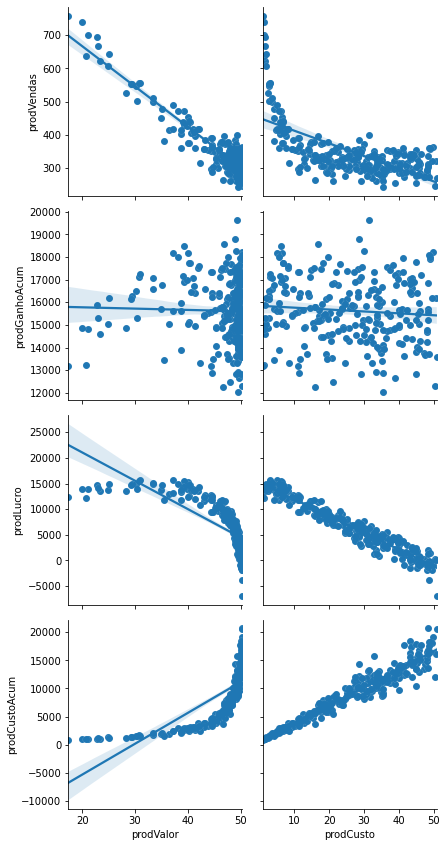

In [12]:
df = pd.read_csv(r"{}".format(folder)+"/CSVLojaOpt/produto_opt.csv")
grid = sns.PairGrid(df, 
                    x_vars=["prodValor", "prodCusto"], 
                 y_vars=["prodVendas","prodGanhoAcum", "prodLucro","prodCustoAcum"], height = 3)
grid.map(plt.scatter, s=50, edgecolor="white")
grid.map(sns.regplot)

**Observe-se agora que o lucro por produto, apesar de queda mais acentuada nas proximidades dos maiores valores, sustenta uma constância e homegeneidade para produtos de menores valores. Isto acarreta que, com relação à distribuição de lucros variáveis, as transações com lucros percentuais otimizados exibem maiores lucros totais que a maioria dos demais anteriormente vistos:}**

In [14]:
df_ref_prod = pd.read_csv(r"{}".format(folder)+"/CSVLojaOpt/produto_opt.csv")

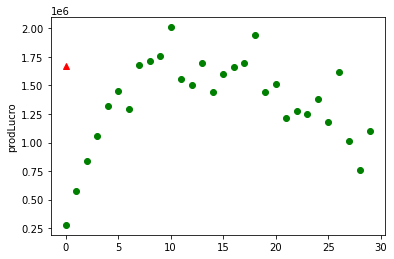

7 valores acima

23 valores abaixo


In [15]:
coluna = "prodLucro"

count_inf = 0
count_sup = 0
list_prodLucro = []
soma_ref = df_ref_prod[coluna].sum()

for luc in range(10,301,10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(luc))
    soma = df[coluna].sum()
    list_prodLucro.append(soma)
    if (soma<soma_ref):
        count_inf+=1
    elif(soma>soma_ref):
        count_sup+=1

plt.plot(list_prodLucro,'go')
plt.plot(soma_ref,'r^')
plt.ylabel(coluna)
plt.show()


print("{} valores acima\n\n{} valores abaixo".format(count_sup,count_inf))

**Em que o triângulo vermelho representa o lucro total com os percentuais ajustados de acordo com o valor do produto, e os pontos verdes são o conjunto das demais distribuições com lucros fixos. De fato, *soma_ref* é este valor encontrado, e o mesmo, segundo o *describe()* dos pontos verdes, é maior que 75% dos seus valores.**

In [16]:
lista = pd.Series(list_prodLucro)
lista.describe()

count    3.000000e+01
mean     1.361328e+06
std      3.925957e+05
min      2.781322e+05
25%      1.188872e+06
50%      1.445405e+06
75%      1.649620e+06
max      2.010444e+06
dtype: float64

In [17]:
soma_ref

1674184.1193

**Comparação com outras colunas:**

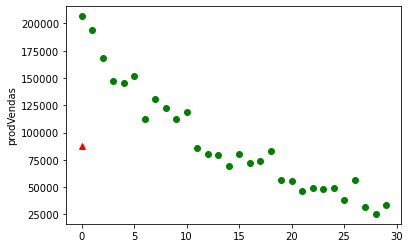

11 valores acima

19 valores abaixo


In [18]:
coluna = "prodVendas"

count_inf = 0
count_sup = 0
list_prodLucro = []
soma_ref = df_ref_prod[coluna].sum()

for luc in range(10,301,10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(luc))
    soma = df[coluna].sum()
    list_prodLucro.append(soma)
    if (soma<soma_ref):
        count_inf+=1
    elif(soma>soma_ref):
        count_sup+=1

plt.plot(list_prodLucro,'go')
plt.plot(soma_ref,'r^')
plt.ylabel(coluna)
plt.show()


print("{} valores acima\n\n{} valores abaixo".format(count_sup,count_inf))

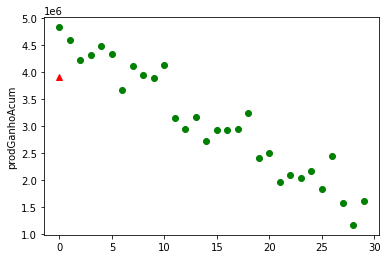

9 valores acima

21 valores abaixo


In [19]:
coluna = "prodGanhoAcum"

count_inf = 0
count_sup = 0
list_prodLucro = []
soma_ref = df_ref_prod[coluna].sum()

for luc in range(10,301,10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(luc))
    soma = df[coluna].sum()
    list_prodLucro.append(soma)
    if (soma<soma_ref):
        count_inf+=1
    elif(soma>soma_ref):
        count_sup+=1

plt.plot(list_prodLucro,'go')
plt.plot(soma_ref,'r^')
plt.ylabel(coluna)
plt.show()


print("{} valores acima\n\n{} valores abaixo".format(count_sup,count_inf))

**E com valores médios por departamento:**

In [20]:
df_ref_dep = pd.read_csv(r"{}".format(folder)+"/CSVLojaOpt/departamento_opt.csv")
df_ref_dep.head()

,Unnamed: 0,idDepartamento,depVendas,depCusto,depGanho,depLucro,Loja_idLoja
0,0,1,4792,117473.0,204501.0,87027.8,1
1,1,2,7743,139778.0,312918.0,173139.0,1
2,2,3,4352,134737.0,206793.0,72055.7,1
3,3,4,4715,159558.0,228722.0,69164.7,1
4,4,5,5477,130114.0,238859.0,108745.0,1


In [21]:
df_ref_dep["depLucro"].mean()

111108.32

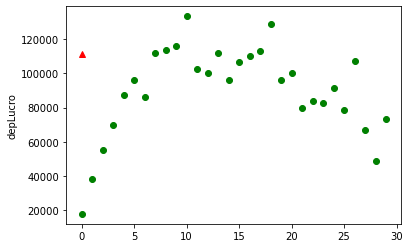

7 valores acima

23 valores abaixo


In [22]:
coluna = "depLucro"

count_inf = 0
count_sup = 0
list_prod = []
media_ref = df_ref_dep[coluna].mean()

for luc in range(10,301,10):
    df = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/departamento_{}.csv".format(luc))
    media = df[coluna].mean()
    list_prod.append(media)
    if (media<media_ref):
        count_inf+=1
    elif(media>media_ref):
        count_sup+=1

plt.plot(list_prod,'go')
plt.plot(media_ref,'r^')
plt.ylabel(coluna)
plt.show()


print("{} valores acima\n\n{} valores abaixo".format(count_sup,count_inf))

**Mostrando que, de fato, um ajuste de lucro individual por produto pode se mostrar mais desejável na maioria dos cenários do que estalecer um padrão de lucro percentual generalizado.**